# Importation

In [2]:
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")
import sys
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
pip install pdfminer.six

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pdfminer.high_level import extract_text

# pdf into txt 

<span style='color: blue;'> 
E_TEXTPMBOK.txt : extracted text from PMBOK PDF  /
E_TEXTPMI.txt :   extracted text from PMI PDF    /
TEXTPMBOK.txt :  text from PMBOK   /
TEXTPMI.txt :    text from PMI</span>

In [42]:
# PDF file paths
pdfPMBOK = "PMBOK6-2017.pdf"
pdfPMI = "practice-standard-project-risk-management.pdf"

In [6]:
# Extract text from the PDF
def reade(file):
    extracted_text = extract_text(file)

    # Print the extracted text to verify
    return extracted_text  

In [43]:
import PyPDF2

# Define the page ranges you want to extract
pmbok_start_page = 309
pmbok_end_page = 354
pmi_start_page = 1
pmi_end_page = 116

# Open the PDF files
with open(pdfPMBOOK, "rb") as pmbok_pdf_file, open(PDFPSPRM, "rb") as pmi_pdf_file:
    pmbok_pdf_reader = PyPDF2.PdfReader(pmbok_pdf_file)
    pmi_pdf_reader = PyPDF2.PdfReader(pmi_pdf_file)

    # Create a PDF writer to store the extracted pages
    pmbok_pdf_writer = PyPDF2.PdfWriter()
    pmi_pdf_writer = PyPDF2.PdfWriter()

    # Extract pages from PMBOK
    for page_num in range(pmbok_start_page - 1, pmbok_end_page):
        pmbok_pdf_writer.add_page(pmbok_pdf_reader.pages[page_num])

    # Extract pages from PMI's standard for PRM
    for page_num in range(pmi_start_page - 1, pmi_end_page):
        pmi_pdf_writer.add_page(pmi_pdf_reader.pages[page_num])

    # Save the extracted pages to new PDF files
    with open("extracted_pmbok.pdf", "wb") as pmbok_extracted_file:
        pmbok_pdf_writer.write(pmbok_extracted_file)

    with open("extracted_pmi.pdf", "wb") as pmi_extracted_file:
        pmi_pdf_writer.write(pmi_extracted_file)

print("Extraction complete.")



Extraction complete.


In [45]:
# PDF file paths
extractedpdfPMBOK = "extracted_pmbok.pdf"
extractedpdfPMI = "extracted_pmi.pdf"

In [46]:
# Extract text from extracted pdfs
E_TEXTPMBOK=reade(extractedpdfPMBOK)
E_TEXTPMI=reade(extractedpdfPMI)
# Extract text from main corpus
TEXTPMBOK=reade(pdfPMBOK)
TEXTPMI=reade(pdfPMI)

The PDF <_io.BufferedReader name='practice-standard-project-risk-management.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


In [47]:
output_file11 = "E_TEXTPMBOK.txt"
output_file22 = "E_TEXTPMI.txt"
output_file1 = "TEXTPMBOK.txt"
output_file2 = "TEXTPMI.txt"

In [48]:
# Save extracted text to a text file

with open(output_file11, "w", encoding="utf-8") as file:
    file.write(E_TEXTPMBOK)
with open(output_file22, "w", encoding="utf-8") as file:
    file.write(E_TEXTPMI)

with open(output_file1, "w", encoding="utf-8") as file:
    file.write(TEXTPMBOK)
with open(output_file2, "w", encoding="utf-8") as file:
    file.write(TEXTPMI)

In [49]:
with open(output_file11, "r", encoding="utf-8") as file:
    E_TEXTPMBOK = file.read()
with open(output_file22, "r", encoding="utf-8") as file:
    E_TEXTPMI = file.read()
    

with open(output_file1, "r", encoding="utf-8") as file:
    TEXTPMBOK = file.read()
with open(output_file2, "r", encoding="utf-8") as file:
    TEXTPMI = file.read()

In [50]:
E_TEXTPMBOK

'Plan\nQuality\nManagement\n\nQuality templates \nfrom organizational\nprocess assets\n\nQuality reports\n\nControl\nQuality\n\nVerified deliverables\n\nManage\nQuality\n\nValidate\nScope\n\nTo Other\nProject\nProcesses\n\nProject\nIntegration\nManagement\n\nDeliverables\nWork performance data\n\nTest and evaluate documents\nQuality reports\n\nQuality management\nplan\nQuality metrics\n\nQuality control \nmeasurements\nWork performance \ninformation\n\nN ot F or Distribution, S ale or R eproduction.\n\nProject  Quality  Management  addresses  the  management  of  the  project  and  the  deliverables  of  the  project.  It \napplies to all projects, regardless of the nature of their deliverables. Quality measures and techniques are speciﬁc \nto the type of deliverables being produced by the project. For example, the project quality management of software \ndeliverables may use different approaches and measures from those used when building a nuclear power plant. In \neither case, failur

In [51]:
E_TEXTPMI

'   Project Management Institute  \n\n  PRACTICE STANDARD \nFOR PROJECT RISK MANAGEMENT  \n\n\x0c ISBN: 978-1-933890-38-8 \n\n Published by: \n  Project Management Institute, Inc. \n\n14 Campus Boulevard \n\n   Newtown Square, Pennsylvania 19073-3299 USA. \n   Phone: +610-356-4600 \nFax: +610-356-4647 \nE-mail: customercare@pmi.org \n\n Internet: www.pmi.org \n\n ©2009 Project Management Institute, Inc. All rights reserved. \n\n “PMI”, the PMI logo, “PMP”, the PMP logo, “PMBOK”, “PgMP”, “Project Management Journal”, “PM Network”, and the PMI \nToday logo are registered marks of Project Management Institute, Inc. The Quarter Globe Design is a trademark of the Project \nManagement Institute, Inc. For a comprehensive list of PMI marks, contact the PMI Legal Department. \n\n PMI Publications welcomes corrections and comments on its books. Please feel free to send comments on typographical, \nformatting, or other errors. Simply make a copy of the relevant page of the book, mark the error, a

In [52]:
TEXTPMBOK

'A Guide to the \nPROJECT MANAGEMENT \nBODY OF KNOWLEDGE\n\nN ot F or Distribution, S ale or R eproduction.\n\n(PMBOK® GUIDE )\nSixth Edition\n\n\x0cLibrary of Congress Cataloging-in-Publication Data\n\nPublished by:\n\nISBN: 978-1-62825-184-5 \n\nProject Management Institute, Inc.\n14 Campus Boulevard\nNewtown Square, Pennsylvania 19073-3299 USA\nPhone: +1 610-356-4600\nFax: +1 610-356-4647\nEmail: customercare@pmi.org\nWebsite: www.PMI.org\n\nNames: Project Management Institute, publisher.\nTitle: A guide to the project management body of knowledge (PMBOK guide) / Project Management Institute.\nOther titles: PMBOK guide\nDescription: Sixth edition. | Newtown Square, PA: Project Management Institute, 2017. | Series: PMBOK guide | Includes \nbibliographical references and index. \nIdentiﬁers: LCCN 2017032505 (print) | LCCN 2017035597 (ebook) | ISBN 9781628253900 (ePUP) | \nISBN 9781628253917 (kindle) | ISBN 9781628253924 ( Web PDF) | ISBN 9781628251845 (paperback)\nSubjects: LCSH: Proj

In [53]:
TEXTPMI

'   Project Management Institute  \n\n  PRACTICE STANDARD \nFOR PROJECT RISK MANAGEMENT  \n\n\x0c ISBN: 978-1-933890-38-8 \n\n Published by: \n  Project Management Institute, Inc. \n\n14 Campus Boulevard \n\n   Newtown Square, Pennsylvania 19073-3299 USA. \n   Phone: +610-356-4600 \nFax: +610-356-4647 \nE-mail: customercare@pmi.org \n\n Internet: www.pmi.org \n\n ©2009 Project Management Institute, Inc. All rights reserved. \n\n “PMI”, the PMI logo, “PMP”, the PMP logo, “PMBOK”, “PgMP”, “Project Management Journal”, “PM Network”, and the PMI \nToday logo are registered marks of Project Management Institute, Inc. The Quarter Globe Design is a trademark of the Project \nManagement Institute, Inc. For a comprehensive list of PMI marks, contact the PMI Legal Department. \n\n PMI Publications welcomes corrections and comments on its books. Please feel free to send comments on typographical, \nformatting, or other errors. Simply make a copy of the relevant page of the book, mark the error, a

# Text preprocessing 

<span style='color: red;'>
Levenshtein distance, also known as the edit distance, is a metric used to measure the similarity between two strings.</span>

<span style='color: red;'>POS tags, or Part-of-Speech tags, are labels or tags assigned to each word in a natural language text, indicating the word's grammatical category or part of speech. These tags provide information about the role a word plays in the sentence and how it relates to other words ; Noun (NN) / Verb (VB) / Adjective (JJ)  / Adverb (RB) / Pronoun (PRP) / Preposition (IN) / Conjunction (CC) / Determiner (DT) / Interjection (UH) / Particle (RP)</span>

In [55]:
pip install python-Levenshtein


     ------------------------------------ 101.0/101.0 kB 252.7 kB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 264.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install sentence-transformers


     --------------------------------------- 86.0/86.0 kB 55.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.2/1.2 MB 40.1 kB/s eta 0:00:00
     ------------------------------------- 977.5/977.5 kB 43.9 kB/s eta 0:00:00
     ------                                 31.6/172.3 MB 64.0 kB/s eta 0:36:39
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\eyawo\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\eyawo\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\eyawo\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\eyawo\anaconda3\lib

In [61]:
import nltk
import Levenshtein
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('omw-1.4')

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eyawo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eyawo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eyawo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyawo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eyawo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization: Split text into words and sentences
    sentences = sent_tokenize(text)
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    # Part of Speech (POS) Tagging
    pos_tags = pos_tag(filtered_words)

    # Lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]

    return sentences, lemmatized_words

In [91]:

# Define a function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    # Map POS tag to WordNet POS tag
    tag = tag[0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)  # Default to noun if not found


 # Calculate Levenshtein distance between all word pairs
    distances = []
    for word1 in filtered_words1:
        for word2 in filtered_words2:
            distance = Levenshtein.distance(word1, word2)
            distances.append(distance)

    # Calculate the average Levenshtein distance
    if distances:
        average_distance = sum(distances) / len(distances)
    else:
        average_distance = 0

    return average_distance

# Calculate Levenshtein distance between words in E_TEXTPMBOK and E_TEXTPMI
levenshtein_distance = calculate_levenshtein_distance(E_TEXTPMBOK, E_TEXTPMI)

print(f"Average Levenshtein distance between words in E_TEXTPMBOK and E_TEXTPMI: {levenshtein_distance}")


Average Levenshtein distance between words in E_TEXTPMBOK and E_TEXTPMI: 174284


In [82]:
pip install sentence-transformers


  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
  Using cached sentencepiece-0.1.99-cp310-cp310-win_amd64.whl (977 kB)
     --------------------------------     157.4/172.3 MB 378.0 kB/s eta 0:00:40
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\eyawo\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\eyawo\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\eyawo\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\eyawo\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\eyawo\anaconda3\lib

In [92]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


# Encode sentences into embeddings
embeddings1 = model.encode(E_TEXTPMBOK, convert_to_tensor=True)
embeddings2 = model.encode(E_TEXTPMI, convert_to_tensor=True)

# Calculate cosine similarity between embeddings
cosine_score = util.pytorch_cos_sim(embeddings1, embeddings2)

print(f"Semantic similarity score: {cosine_score.item()}")


ConnectionError: HTTPSConnectionPool(host='cdn-lfs.huggingface.co', port=443): Read timed out.

In [88]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [89]:
from transformers import BertTokenizer, BertModel
import torch

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the text
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(E_TEXTPMI)))

# Encode the text with BERT
input_ids = tokenizer.encode(tokens, add_special_tokens=True)
with torch.no_grad():
    embeddings = model(torch.tensor(input_ids).unsqueeze(0))[0]

# Detection of breakpoints (cosine similarity)
threshold = 0.9
breakpoints = []
for i in range(1, len(embeddings)):
    similarity = torch.cosine_similarity(embeddings[i - 1], embeddings[i], dim=0)
    if similarity < threshold:
        breakpoints.append(i)

# Segmentation of the text into sections
sections = []
start = 0
for breakpoint in breakpoints:
    sections.append(tokens[start:breakpoint])
    start = breakpoint

# Add the last section
sections.append(tokens[start:])

# Reconstruct the sections into text
for i, section_tokens in enumerate(sections):
    section_text = tokenizer.convert_tokens_to_string(section_tokens)
    print(f"Section {i + 1}:\n{section_text}\n")


ConnectionError: HTTPSConnectionPool(host='cdn-lfs.huggingface.co', port=443): Read timed out.

# =====================================

In [13]:
# Define a function to remove stopwords and newline characters
def remove_stopwords_and_newlines(text):
    # Tokenize the text into words
    words = text.split()

    # Load NLTK stopwords
    stop_words = set(stopwords.words("english"))

    # Remove stopwords and newline characters
    cleaned_words = [word for word in words if word.lower() not in stop_words and word != "\n"]

    # Join the cleaned words back into a text
    cleaned_text = " ".join(cleaned_words)
    
    return cleaned_text

In [14]:
# Remove stopwords and newline characters from the content
cleaned_text = remove_stopwords_and_newlines(TEXTPSPRM)
cleaned_text2 = remove_stopwords_and_newlines(TEXTPMBOOK)

In [15]:
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation and numbers
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove words with a number next to them
    cleaned_text = re.sub(r'\b\w*\d\w*\b', '', cleaned_text)

    return cleaned_text

In [16]:
# Clean the text
cleaned_text = clean_text(cleaned_text).lower()
cleaned_text2 = clean_text(cleaned_text2).lower()

In [17]:
cleaned_text

'project management institute practice standard project risk management isbn  published by project management institute inc  campus boulevard newtown square pennsylvania  usa phone  fax  email customercarepmiorg internet wwwpmiorg  project management institute inc rights reserved pmi pmi logo pmp pmp logo pmbok pgmp project management journal pm network pmi today logo registered marks project management institute inc quarter globe design trademark project management institute inc comprehensive list pmi marks contact pmi legal department pmi publications welcomes corrections comments books please feel free send comments typographical formatting errors simply make copy relevant page book mark error send to book editor pmi publications  campus boulevard newtown square pa  usa inquire discounts resale educational purposes please contact pmi book service center pmi book service center po box  atlanta ga  usa phone  within us canada  globally fax  email bookorderspmiorg printed united states

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [20]:
# Tokenize the cleaned text into words
words = nltk.word_tokenize(TEXTPSPRM)

# Perform part-of-speech tagging
pos_tags = nltk.pos_tag(words)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\eyawo/nltk_data'
    - 'C:\\Users\\eyawo\\anaconda3\\nltk_data'
    - 'C:\\Users\\eyawo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\eyawo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\eyawo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [20]:
for word, pos in pos_tags:
    print(f"Word: {word}, POS Tag: {pos}")

Word: Project, POS Tag: NNP
Word: Management, POS Tag: NNP
Word: Institute, POS Tag: NNP
Word: PRACTICE, POS Tag: NNP
Word: STANDARD, POS Tag: NNP
Word: FOR, POS Tag: NNP
Word: PROJECT, POS Tag: NNP
Word: RISK, POS Tag: NNP
Word: MANAGEMENT, POS Tag: NNP
Word: ISBN, POS Tag: NNP
Word: :, POS Tag: :
Word: 978-1-933890-38-8, POS Tag: CD
Word: Published, POS Tag: VBN
Word: by, POS Tag: IN
Word: :, POS Tag: :
Word: Project, POS Tag: NN
Word: Management, POS Tag: NNP
Word: Institute, POS Tag: NNP
Word: ,, POS Tag: ,
Word: Inc., POS Tag: NNP
Word: 14, POS Tag: CD
Word: Campus, POS Tag: NNP
Word: Boulevard, POS Tag: NNP
Word: Newtown, POS Tag: NNP
Word: Square, POS Tag: NNP
Word: ,, POS Tag: ,
Word: Pennsylvania, POS Tag: NNP
Word: 19073-3299, POS Tag: CD
Word: USA, POS Tag: NNP
Word: ., POS Tag: .
Word: Phone, POS Tag: NN
Word: :, POS Tag: :
Word: +610-356-4600, POS Tag: JJ
Word: Fax, POS Tag: NN
Word: :, POS Tag: :
Word: +610-356-4647, POS Tag: JJ
Word: E-mail, POS Tag: NN
Word: :, POS Tag:

In [59]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

In [73]:
# Tokenize the cleaned and lowercase text into words
words = nltk.word_tokenize(cleaned_text)
words2 = nltk.word_tokenize(cleaned_text2)

In [74]:
# Apply stemming to each word
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words2 = [stemmer.stem(word) for word in words2]

In [75]:
# Join the stemmed words back into text
stemmed_text = " ".join(stemmed_words)
stemmed_text2 = " ".join(stemmed_words2)

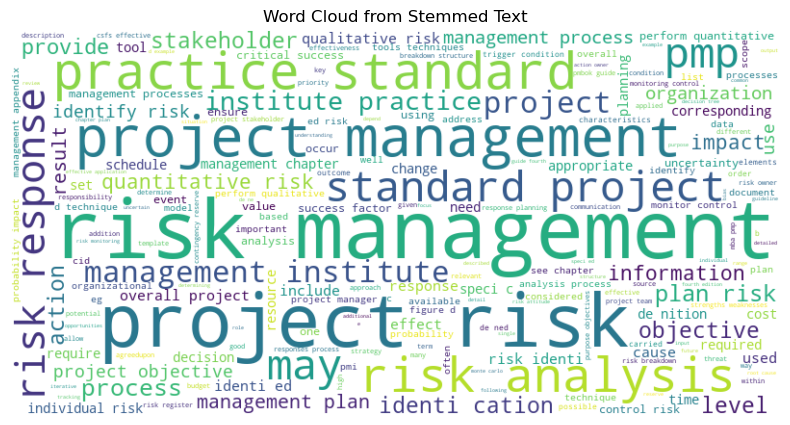

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Stemmed Text")
plt.show()


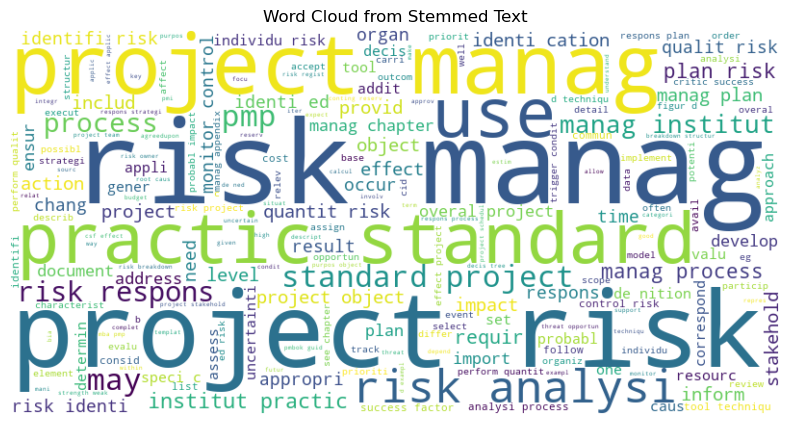

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(stemmed_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Stemmed Text")
plt.show()


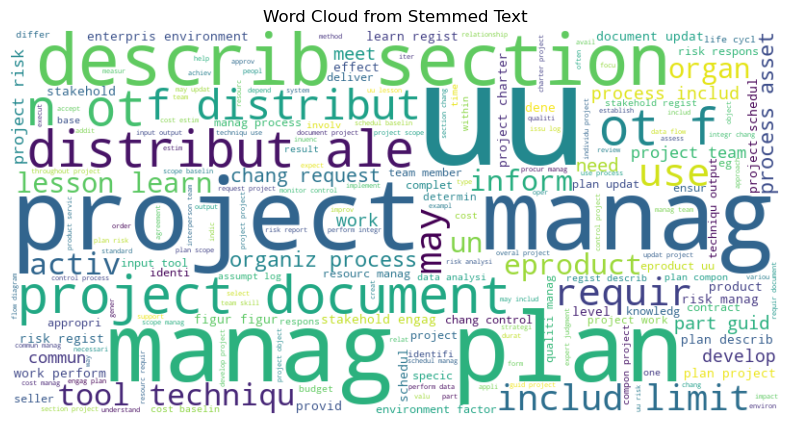

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(stemmed_text2)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Stemmed Text")
plt.show()
